In [4]:
import numpy as np
import matplotlib.pyplot as plt

(401, 4096)
(9, 4096)
[0.]


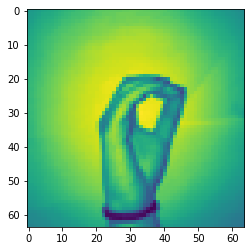

In [102]:
X = np.load('C:/Users/Rushad/Desktop/handsign-recog/data/X.npy')
Y = np.load('C:/Users/Rushad/Desktop/handsign-recog/data/Y.npy')

x = np.concatenate((X[204:409], X[822:1027] ), axis=0)
y = np.concatenate((np.zeros(205), np.ones(205)), axis=0).reshape(x.shape[0],1)

train_pct_index = int(0.98 * len(x))
x_train, x_test = x[:train_pct_index], x[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

x_train_flatten = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

print(x_train_flatten.shape)
print(x_test_flatten.shape)
plt.imshow(x_train[120])
print(y_train[120])

In [70]:
def para_init(layer_dims, iterations):
    """
    Initialize parameters of NN
    """
    parameters = {}

    for l in range(1, len(layer_dims)):
        parameters["W" + str(l)] = np.random.rand(layer_dims[l], layer_dims[l-1]) * np.sqrt(1/iterations)
        parameters["b" + str(l)] = np.random.rand(layer_dims[l], 1)
    
    return parameters

In [90]:
def sigmoid(z):
    '''
    Sigmoid activation function
    '''
    a = 1/(1 + np.exp(-z))
    return a

In [91]:
parameters = para_init(layer_dims=[x_train_flatten.shape[1], x_train_flatten.shape[1], 8, 2, 1] , iterations=100)

In [97]:
def forward_prop():
    """
    Implementation of forward propogation
    """
    w1 = parameters['W1']
    w2 = parameters['W2']
    w3 = parameters['W3']
    w4 = parameters['W4']
    
    b1 = parameters['b1']
    b2 = parameters['b2']
    b3 = parameters['b3']
    b4 = parameters['b4']
    
    z1 = np.dot(w1, x_train_flatten.T) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(w3, a2) + b3
    a3 = sigmoid(z3)
    z4 = np.dot(w4, a3) + b4
    a4 = sigmoid(z4)
    
    cache = {"Z1": z1,
             "A1": a1,
             "Z2": z2,
             "A2": a2,
             "Z3": z3,
             "A3": a3,
             "Z4": z4,
             "A4": a4}

    return a4, cache

In [ ]:
def cost_function(a4):
    '''
    Computation of corss-entropy cost function
    '''
    m = y_train.shape[0]
    logprob = np.multiply(y_train, np.log(a4)) + np.multiply((1 - y_train), np.log(1 - a4))
    cost -= np.sum(logprob)/m